<a href="https://colab.research.google.com/github/IsabelCBarros/DIO_Desafio_Python---Potencia_Tech_poweredy_iFood/blob/main/Otimizando_o_Sistema_Banc%C3%A1rio_com_Fun%C3%A7%C3%B5es_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

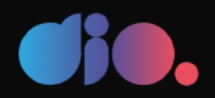

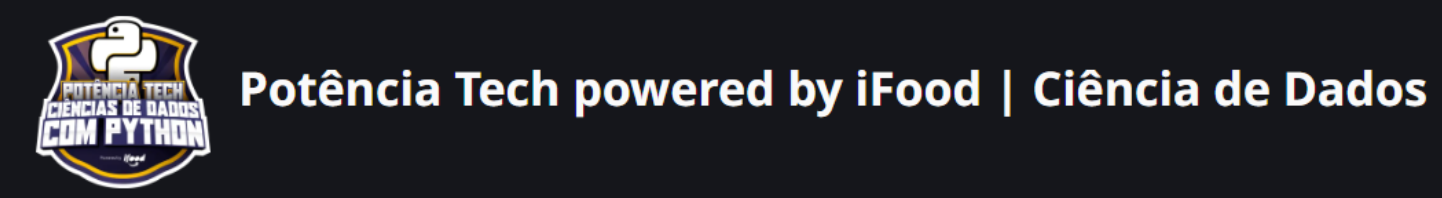

##Otimizando o Sistema Bancário com Funções Python##


Isabel Cristina de Barros

Data: 31.08.2023

In [ ]:
import textwrap


def menu():
    menu = """\n
    ================ MENU ================
    [1]\tDepositar
    [2]\tSacar
    [3]\tExtrato
    [4]\tNova conta
    [5]\tListar contas
    [6]\tNovo usuário
    [0]\tSair
    => """


    return input(textwrap.dedent(menu))


def depositar(saldo, valor, extrato, /):
    if valor > 0:
        saldo += valor
        extrato += f"Depósito:\tR$ {valor:.2f}\n"
        print("\n=== Depósito realizado com sucesso! ===")
    else:
        print("\n@@@ Operação falhou! O valor informado é inválido. @@@")

    return saldo, extrato


def sacar(*, saldo, valor, extrato, limite, numero_saques, limite_saques):
    excedeu_saldo = valor > saldo
    excedeu_limite = valor > limite
    excedeu_saques = numero_saques >= limite_saques

    if excedeu_saldo:
        print("\n@@@ Operação falhou! Você não tem saldo suficiente. @@@")

    elif excedeu_limite:
        print("\n@@@ Operação falhou! O valor do saque excede o limite. @@@")

    elif excedeu_saques:
        print("\n@@@ Operação falhou! Número máximo de saques excedido. @@@")

    elif valor > 0:
        saldo -= valor
        extrato += f"Saque:\t\tR$ {valor:.2f}\n"
        numero_saques += 1
        print("\n=== Saque realizado com sucesso! ===")

    else:
        print("\n@@@ Operação falhou! O valor informado é inválido. @@@")

    return saldo, extrato


def exibir_extrato(saldo, /, *, extrato):
    print("\n================ EXTRATO ================")
    print("Não foram realizadas movimentações." if not extrato else extrato)
    print(f"\nSaldo:\t\tR$ {saldo:.2f}")
    print("==========================================")


def criar_usuario(usuarios):
    cpf = input("Informe o seu CPF (somente número): ")
    usuario = filtrar_usuario(cpf, usuarios)

    if usuario:
        print("\n@@@ Parece que já existe usuário com esse CPF! @@@")
        return

    nome = input("Informe o seu nome completo: ")
    data_nascimento = input("Informe a data do seu nascimento (dd-mm-aaaa): ")
    endereco = input("Informe o seu endereço (logradouro, nro - bairro - cidade/sigla estado): ")

    usuarios.append({"nome": nome, "data_nascimento": data_nascimento, "cpf": cpf, "endereco": endereco})

    print("=== Usuário criado com sucesso! ===")


def filtrar_usuario(cpf, usuarios):
    usuarios_filtrados = [usuario for usuario in usuarios if usuario["cpf"] == cpf]
    return usuarios_filtrados[0] if usuarios_filtrados else None


def criar_conta(agencia, numero_conta, usuarios):
    cpf = input("Informe o CPF do usuário: ")
    usuario = filtrar_usuario(cpf, usuarios)

    if usuario:
        print("\n=== Conta criada com sucesso! ===")
        return {"agencia": agencia, "numero_conta": numero_conta, "usuario": usuario}

    print("\n@@@ Usuário não encontrado, fluxo de criação de conta encerrado! @@@")


def listar_contas(contas):
    for conta in contas:
        linha = f"""\
            Agência:\t{conta['agencia']}
            C/C:\t\t{conta['numero_conta']}
            Titular:\t{conta['usuario']['nome']}
        """
        print("=" * 100)
        print(textwrap.dedent(linha))


def main():
    LIMITE_SAQUES = 3
    AGENCIA = "0001"

    saldo = 0
    limite = 500
    extrato = ""
    numero_saques = 0
    usuarios = []
    contas = []

    while True:
        opcao = menu()

        if opcao == "d":
            valor = float(input("Informe o valor do depósito: "))

            saldo, extrato = depositar(saldo, valor, extrato)

        elif opcao == "s":
            valor = float(input("Informe o valor do saque: "))

            saldo, extrato = sacar(
                saldo=saldo,
                valor=valor,
                extrato=extrato,
                limite=limite,
                numero_saques=numero_saques,
                limite_saques=LIMITE_SAQUES,
            )

        elif opcao == "e":
            exibir_extrato(saldo, extrato=extrato)

        elif opcao == "nu":
            criar_usuario(usuarios)

        elif opcao == "nc":
            numero_conta = len(contas) + 1
            conta = criar_conta(AGENCIA, numero_conta, usuarios)

            if conta:
                contas.append(conta)

        elif opcao == "lc":
            listar_contas(contas)

        elif opcao == "q":
            break

        else:
            print("Operação inválida, por favor selecione novamente a operação desejada.")


main()



================ MENU ================
[1]	Depositar
[2]	Sacar
[3]	Extrato
[4]	Nova conta
[5]	Listar contas
[6]	Novo usuário
[0]	Sair
=> d
Informe o valor do depósito: 600

=== Depósito realizado com sucesso! ===


================ MENU ================
[1]	Depositar
[2]	Sacar
[3]	Extrato
[4]	Nova conta
[5]	Listar contas
[6]	Novo usuário
[0]	Sair
=> s
Informe o valor do saque: 230

=== Saque realizado com sucesso! ===


================ MENU ================
[1]	Depositar
[2]	Sacar
[3]	Extrato
[4]	Nova conta
[5]	Listar contas
[6]	Novo usuário
[0]	Sair
=> e

================ EXTRATO ================
Depósito:	R$ 600.00
Saque:		R$ 230.00


Saldo:		R$ 370.00


================ MENU ================
[1]	Depositar
[2]	Sacar
[3]	Extrato
[4]	Nova conta
[5]	Listar contas
[6]	Novo usuário
[0]	Sair
=> nc
Informe o CPF do usuário: 229

@@@ Usuário não encontrado, fluxo de criação de conta encerrado! @@@


================ MENU ================
[1]	Depositar
[2]	Sacar
[3]	Extrato
[4]	Nova conta
